In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("D:/Google Drive/Python/QD-energy/Lib/")
from scipy.sparse.linalg import eigs, spsolve
from scipy.sparse import eye, csr_matrix, spdiags
from QD import int_cyl, Builder, Solver
import parameter, matrix, geometry

In [2]:
"""""""""""""""""""""  QD Dimension  """""""""""""""""""""""
" materials = [Material1, Material2, Material3]            "  
" radius = [Mat1's radius, Mat2's radius                   "
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# for  QD
#materials = ['ZnSe', 'ZnS', 'CdS']  
#radius = [4.6e-9, 2.6e-9, 2e-9]  # from outside to inside

""""""""""""""""   Nanorod Dimension """""""""""""""""""""""
" Material1 = [Material, radius, starting z, ending z]     "
" Materials = [Material1, Material2, Material3]            "  
" Mat3's ending z should be the highest                    "
" Material1's starting z should be 2e-9                    "
""""""""""""""""""""""""""""""""""""""""""""""""""""""
# for Nanorod
#material1 = ['ZnSe', 2e-9, 2e-9, 5e-9]
#material2 = ['CdS', 2e-9, 5e-9, 8e-9]
#materials = [material1, material2]


"""""""""""""""""""   dot in rod Dimension  """"""""""""""""
" rod = [Material, radius, starting z, ending z]           "
" dot = [Material, radius, center point (z)]               "
" Materials = [rod, dot]                                   "  
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# for dot in rod
rod = ['CdS', 2.7e-9, 2e-9, 22e-9] 
dot = ['CdSe', 2e-9, 12e-9]
materials = [rod, dot]


dr = 2e-10
dz= 2e-10
#field = -400

Bulk Eg = 1.74
mesh size = 25 x 121 = 3025


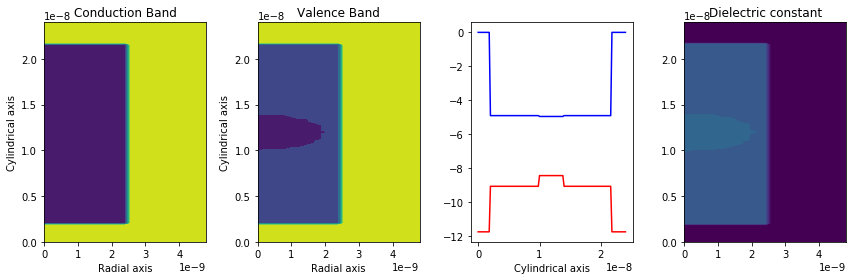

In [3]:
a = Builder(dr, dz)
#a.QD(materials, radius)
#a.nanorod(materials)
a.dot_in_rod(materials)
a.plot_energy_band()
a.matrix()
#a.e_field_matrix(field)

In [4]:
b = Solver()
b.solve(a, e_field = False)
eo = b.energy
#b.self_consistency(a, 10, e_field = False, charges = 'exciton', image_charge = True)
#b.plot(a)
#a.coulomb_matrix(b, charges = 'electron')
#b.solve(a, coulomb_potential = True)
#b.plot(a)

Energy : 1.978877975539789 eV


C:\anaconda3\lib\site-packages\numpy\ma\core.py:2788: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


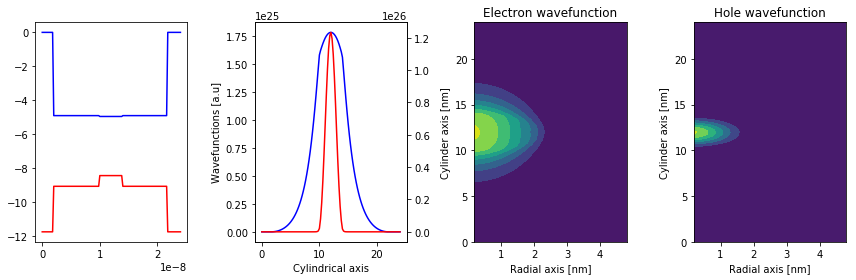

In [5]:
b.plot(a, e_field = False)

In [8]:
b.self_consistency(a, 10, e_field = False, charges = 'exciton', image_charge = True)
ex = b.energy

Energy : 1.978877975539791 eV
Energy : 1.88512686352149 eV
0 : Energy difference : 0.093751112018301
Energy : 1.871426462555732 eV
1 : Energy difference : 0.013700400965757975
Energy : 1.87174657290963 eV


In [9]:
ex

1.87174657290963

In [7]:
exx

1.885649473520913

In [6]:
b.self_consistency(a, 10, e_field = False, charges = 'biexciton', image_charge = True)
exx = b.energy

Energy : 1.9788779755397903 eV
Energy : 1.9062416282643584 eV
0 : Energy difference : 0.07263634727543189
Energy : 1.882929715729906 eV
1 : Energy difference : 0.023311912534452306
Energy : 1.8865583881216554 eV
2 : Energy difference : 0.0036286723917493546
Energy : 1.885649473520913 eV
